In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
pack_cuda._ensure_initialized()


local
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, used 1 barriers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compile time = 9.147 ms
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info  

In [2]:
%load_ext pyinstrument

Before optimization:  0.23643578588962555 3.436564657022245e-05 4.862113
After optimization:  0.23539935052394867 0.0004617834638338536 4.847036
After optimization:  0.23592713475227356 0.00013502319052349776 4.855843
After optimization:  0.23634406924247742 3.195154567947611e-05 4.8611946
After optimization:  0.2365727424621582 8.160692232195288e-06 4.8637905
After optimization:  0.23669753968715668 2.04154684979585e-06 4.865136
After optimization:  0.2367577701807022 5.261531441647094e-07 4.865771
After optimization:  0.23678714036941528 1.566174603340187e-07 4.8660765
After optimization:  0.23680555820465088 3.9542857876995186e-08 4.8662667
After optimization:  0.23681096732616425 2.2862209902996256e-08 4.8663225
After optimization:  0.23681984841823578 5.41715916568819e-09 4.866414
After optimization:  0.2368226796388626 2.358622186449111e-09 4.866443
After optimization:  0.23682546615600586 6.414415665290107e-10 4.866472
After optimization:  0.23682644963264465 3.086019773057558e-

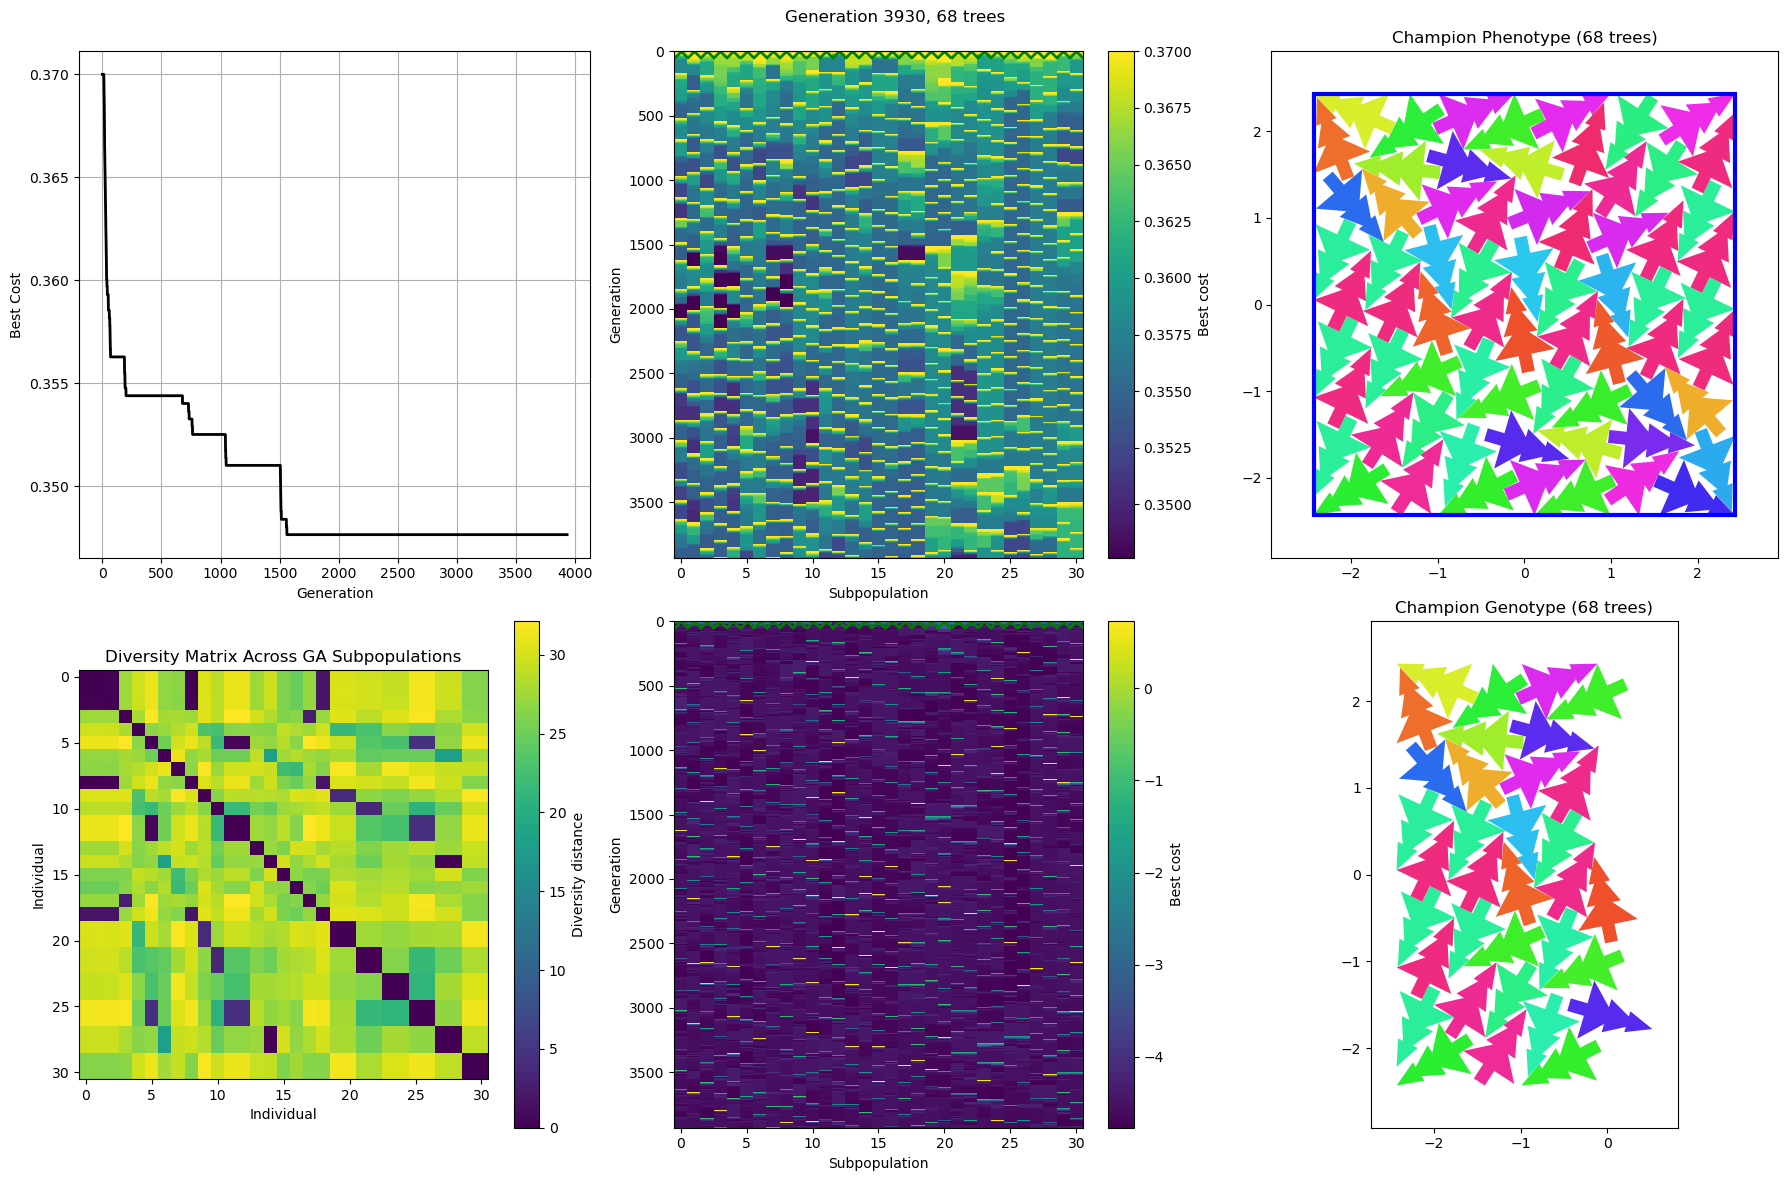

In [3]:
#%%pyinstrument
#kgs.profiling=True
# %matplotlib widget
#kgs.enable_module_profiling(kgs)
import pack_ga3
import pack_runner
fastMode = False
kgs.debugging_mode = 1

for seed in range(1):

    runner = pack_ga3.baseline_symmetry_180()
    pack_runner.set_connectivity_pattern(runner, '', 6) #tree
    print(type(runner.ga))
    runner.ga.connect_siblings = True
    runner.ga.parent_child_depth = 3
    runner.ga.parent_child_one_way = True    
    runner.ga.allow_reset_ratio = 1.
    runner.ga.diversity_reset_threshold = -1.
    runner.ga.ga_base.reset_check_generations = 100
    runner.ga.ga_base.reset_check_generations_ratio = 0.
    runner.ga.ga_base.always_allow_mate_with_better = True
    runner.rough_relaxers[0].max_step = 1e-1
    print('still scale reset checks')

    runner.ga.ga_base.N_trees_to_do = 68
    runner.diagnostic_plot = True
    runner.seed = seed
    runner.plot_every = 10
    #runner.filter_before_rough = 1.

    runner.run()